In [1]:
import os
import time
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#os.getcwd()

## Read-in data

In [38]:
# Read Dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]
print(df.shape)

# # Label encode naively
# columns_to_encode  = ['job','marital','education','contact','day_of_week','month','default','housing','loan','y']
# le = preprocessing.LabelEncoder()
# for column in columns_to_encode:
#         df[column] = le.fit_transform(df[column])
          
# Create Training and Testing Data
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(collections.Counter(y_train),collections.Counter(y_test))

# View data
df.iloc[:10,:]

(4119, 11)
Counter({0: 2563, 1: 320}) Counter({0: 1105, 1: 131})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,1,1,2,0,2,0,0,6,0,0
1,39,7,2,3,0,0,0,1,6,0,0
2,25,7,1,3,0,2,0,1,4,4,0
3,38,7,1,2,0,1,1,1,4,0,0
4,47,0,1,6,0,2,0,0,7,1,0
5,32,7,2,6,0,0,0,0,9,2,0
6,32,0,2,6,0,2,0,0,9,1,0
7,41,2,1,6,1,2,0,0,7,1,0
8,31,7,0,5,0,0,0,0,7,3,0
9,35,1,1,2,1,0,0,1,6,2,0


## Check for null values and duplicate records

In [40]:
df.drop_duplicates(inplace=True)
print(df.shape)
ddf = pd.isna(df.values)
pd.DataFrame(ddf, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                           'contact', 'month', 'day_of_week','y'])

(4012, 11)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4007,False,False,False,False,False,False,False,False,False,False,False
4008,False,False,False,False,False,False,False,False,False,False,False
4009,False,False,False,False,False,False,False,False,False,False,False
4010,False,False,False,False,False,False,False,False,False,False,False


## Note:
The data set contains about 107 duplicate records. This could very well be different customers who coincidentally have exactly the same attributes/profile. The question is how will removing them affect the model? Keeping them is likely to assign a higher weight to clients with a similar profile but is that prudent?

In [41]:
pd.concat([df.describe(include='all'), df.dtypes.to_frame().T])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
count,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012
mean,40.1977,3.84895,1.17273,3.77418,0.198405,1.07951,0.355184,0.359172,4.31231,2.00174,0.111914
std,10.355,3.60083,0.606887,2.15096,0.399473,0.983995,0.747448,0.479818,2.30084,1.39102,0.3153
min,18,0,0,0,0,0,0,0,0,0,0
25%,32,1,1,2,0,0,0,0,3,1,0
50%,38,3,1,3,0,2,0,0,4,2,0
75%,47,7,2,6,0,2,0,1,6,3,0
max,88,11,3,7,2,2,2,1,9,4,1
0,int64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32


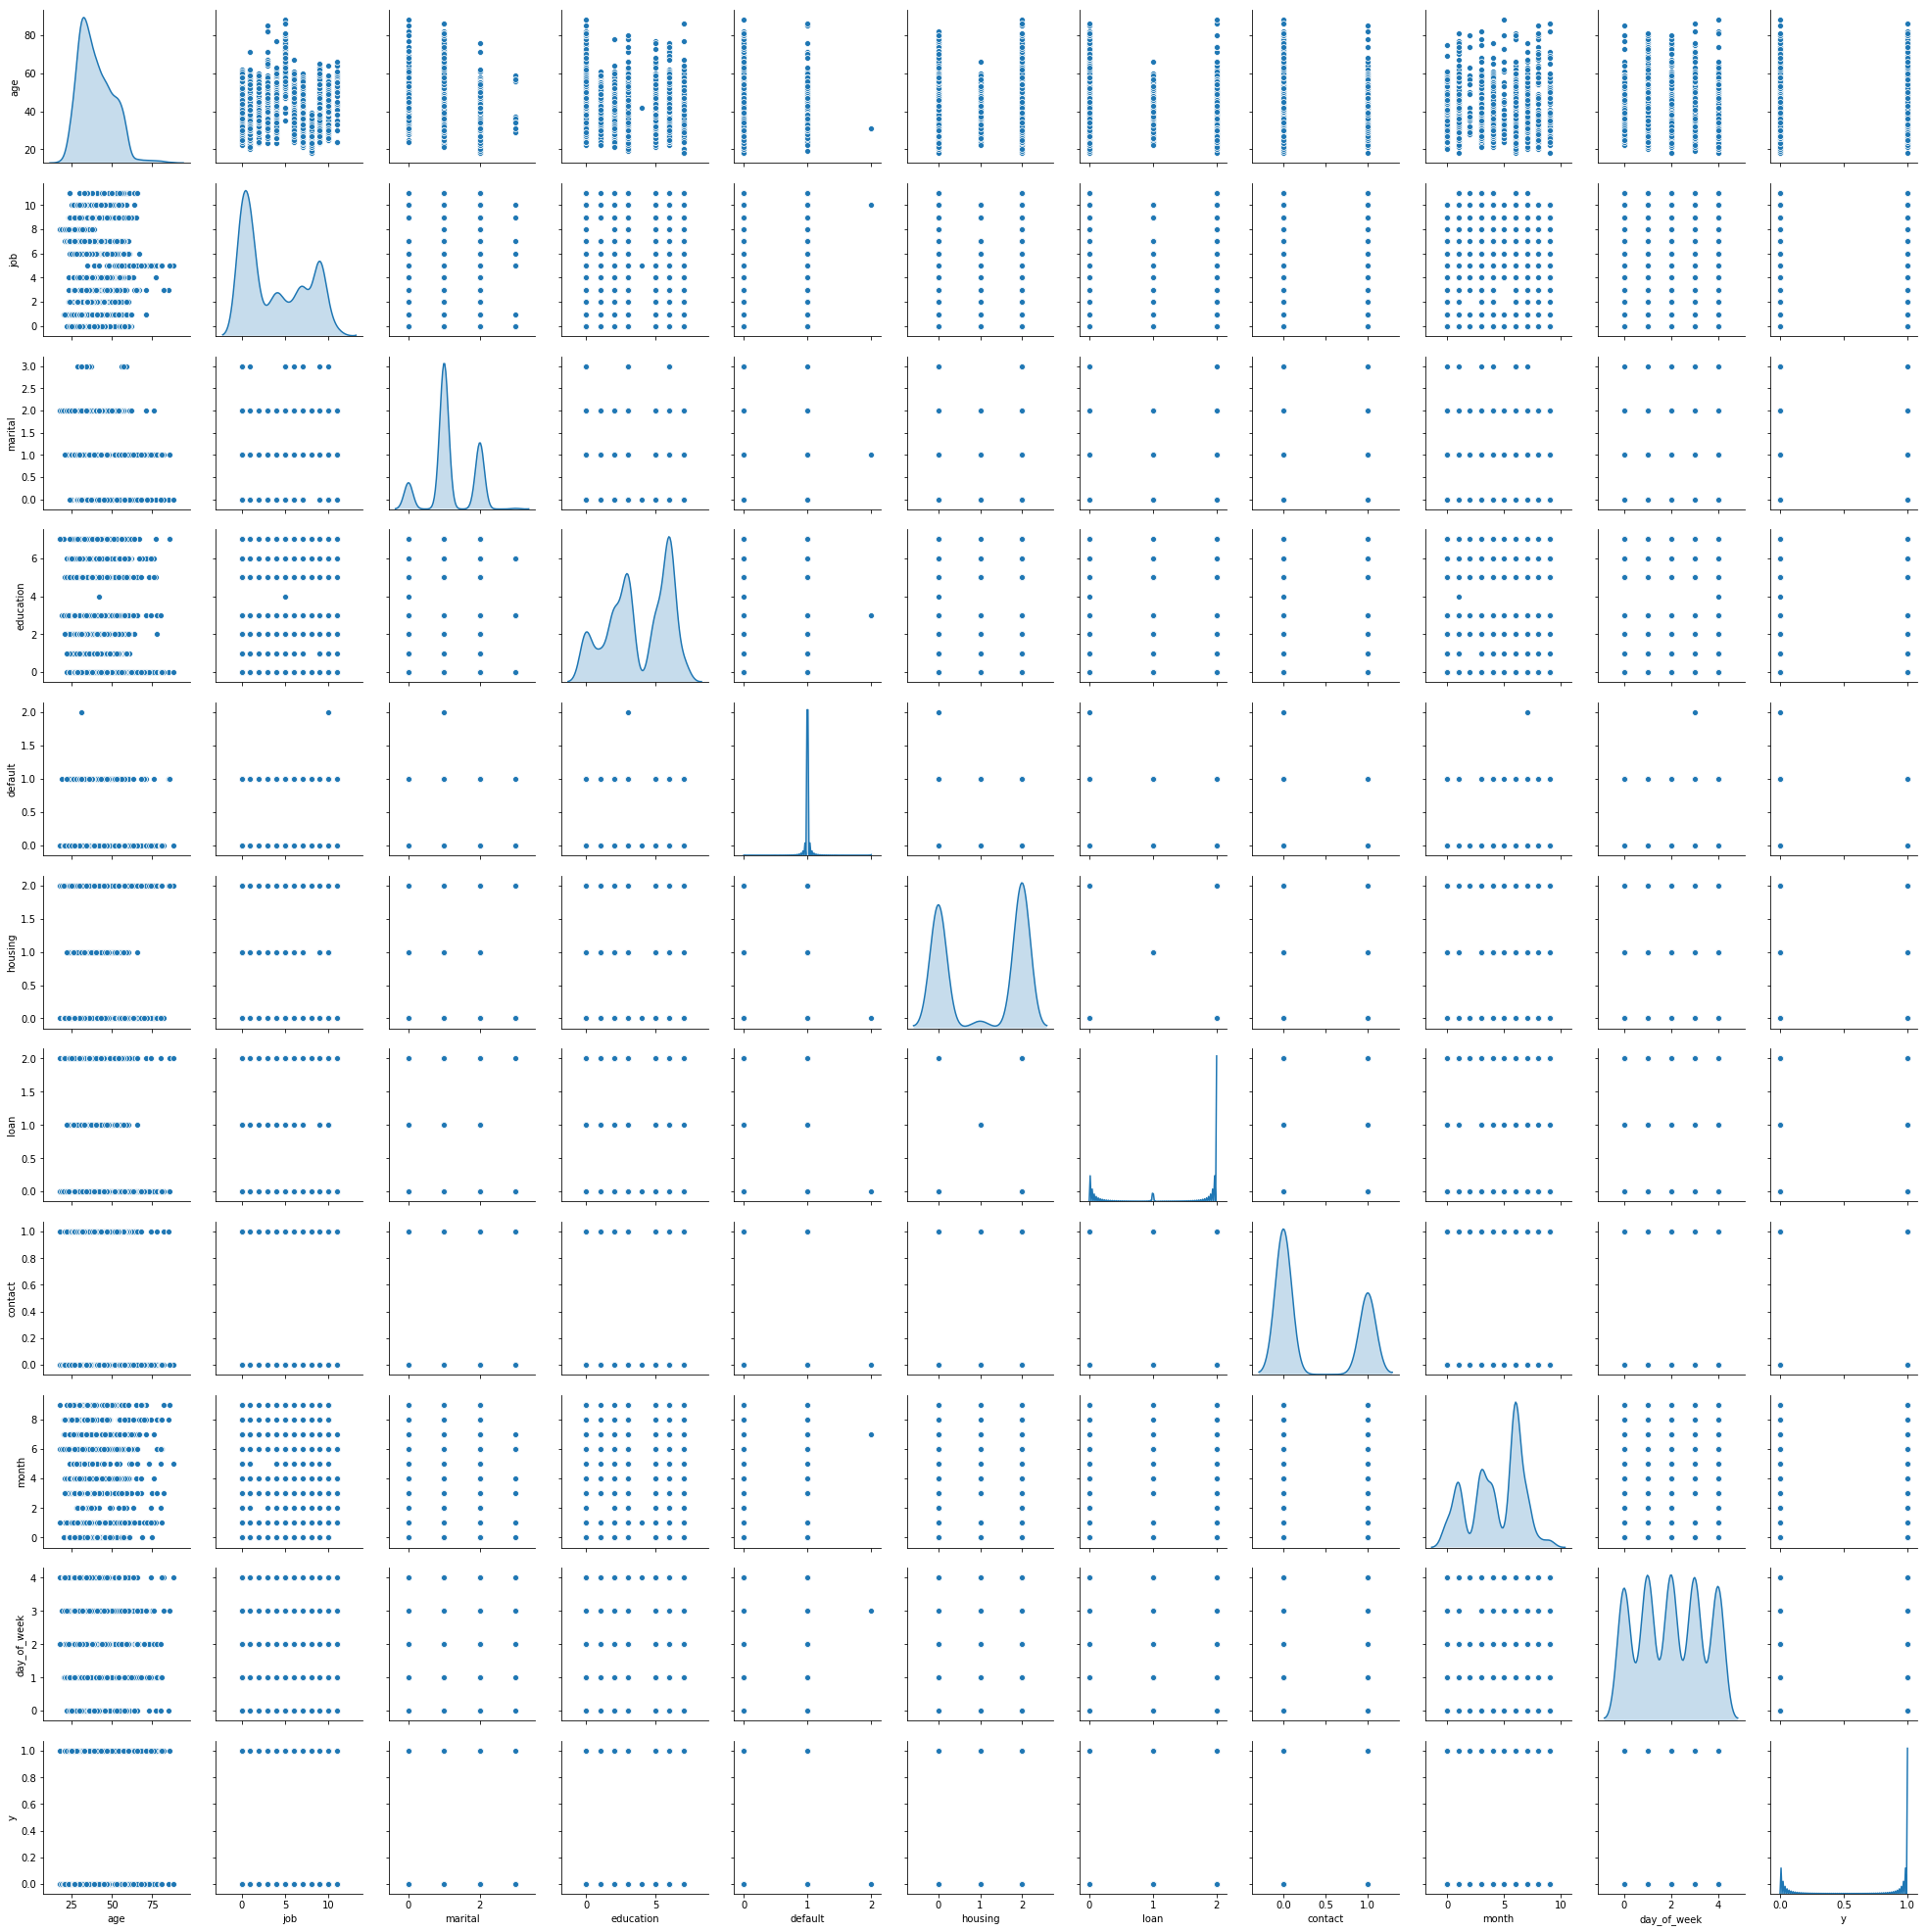

In [42]:
sns.pairplot(df,kind='scatter',diag_kind='kde')

## Correlation Matrix

In [43]:
def Correlation_Matrix(X):
    
    corrB = X.corr()
    cmap = cmap =sns.diverging_palette(250, 15, s=75, l=40, as_cmap=True, center='dark')
    #sns.palplot(sns.color_palette("bright", 10))
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])]

    corrmatrix = corrB.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    return corrmatrix

corrmatrix = Correlation_Matrix(df)

In [44]:
corrmatrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
age,1,0.012,-0.39,-0.12,0.16,-0.005,-0.01,0.0097,-0.025,-0.026,0.06
job,0.012,1,0.015,0.14,-0.042,0.0021,-0.0054,-0.015,-0.018,-0.0063,0.023
marital,-0.39,0.015,1,0.1,-0.081,-0.00046,-0.0028,-0.063,-0.026,0.0076,0.045
education,-0.12,0.14,0.1,1,-0.2,0.026,-0.02,-0.11,-0.075,-0.044,0.07
default,0.16,-0.042,-0.081,-0.2,1,-0.0097,0.0061,0.15,-0.012,-0.01,-0.079
housing,-0.005,0.0021,-0.00046,0.026,-0.0097,1,0.064,-0.07,-0.038,0.01,0.00024
loan,-0.01,-0.0054,-0.0028,-0.02,0.0061,0.064,1,0.0022,-0.026,0.004,-0.015
contact,0.0097,-0.015,-0.063,-0.11,0.15,-0.07,0.0022,1,0.25,-0.012,-0.14
month,-0.025,-0.018,-0.026,-0.075,-0.012,-0.038,-0.026,0.25,1,0.035,0.0034
day_of_week,-0.026,-0.0063,0.0076,-0.044,-0.01,0.01,0.004,-0.012,0.035,1,-0.005


In [45]:
from sklearn.feature_selection import mutual_info_classif
import scipy.stats as ss

df_ = pd.DataFrame(df.corr(method='spearman').y)
df_.drop(df_.index[10], inplace=True)

mutual = pd.DataFrame(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None))
mutual.index = df_.index

df_['Mutual Information Criteria']=mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
df_. rename(columns={'y': 'Pearson Correlation Coefficient'}, inplace=True)
df_

,Pearson Correlation Coefficient,Mutual Information Criteria
age,0.023023,0.006751
job,0.007183,0.007823
marital,0.046862,0.003320
education,0.071790,0.005654
default,-0.079304,0.000000
housing,0.000398,0.003639
loan,-0.016548,0.000000
contact,-0.140519,0.010028
month,0.000475,0.036082
day_of_week,-0.005044,0.000116


## Feature Selection

In [67]:
from sklearn.ensemble import AdaBoostClassifier

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
for i in features:
    ac = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,random_state=13),
                         algorithm="SAMME.R",
                         learning_rate=0.01,
                         n_estimators=500,
                         random_state=13).fit(X_train[[i]], y_train)  
    print(i,ac.score(X_test[[i]],y_test))

age 0.88996763754
job 0.894012944984
marital 0.894012944984
education 0.894012944984
default 0.894012944984
housing 0.894012944984
loan 0.894012944984
contact 0.894012944984
month 0.895631067961
day_of_week 0.894012944984


Notes_Feature Selection:
1. The "month" feature gives the highest accuracy and "age" the least. 

## Normalise Age attribute

In [46]:
#Select numerical columns which need to be normalized
train_norm = X_train[X_train.columns[0:1]]
test_norm = X_test[X_test.columns[0:1]]

# Normalise training data
std_scale1 = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale1.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
X_train.update(training_norm_col)

# Normalise testing data
x_test_norm = std_scale1.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
X_test.update(testing_norm_col) # Update test data with normalised columns

C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


## Hyperparameter Tuning

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import GridSearchCV

# Create and fit an AdaBoosted decision tree
lr_list = [0.5, 0.65, 0.75, 0.85, 0.95,1] #0.5, 0.65, 0.75, 0.85, 0.95,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,
est_list = [100,200,300,400,500,600,700,800,900,1000] # 10,20,30,40,50,60,70,80,90,100 min_samples_leaf=30,

for learning_rate in lr_list:
    for n_est in est_list:
        abdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=10),
                             algorithm="SAMME",
                             learning_rate=learning_rate,
                             n_estimators=n_est,
                            random_state=13)
        %time abdt.fit(X_train, y_train)
    
        print("Learning rate, Estimators: ",learning_rate , n_est)
        print("Accuracy score (training): {0:.3f}".format(abdt.score(X_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(abdt.score(X_test, y_test)))
        print("\n")

Wall time: 420 ms
Learning rate, Estimators:  0.5 100
Accuracy score (training): 0.897
Accuracy score (validation): 0.892


Wall time: 822 ms
Learning rate, Estimators:  0.5 200
Accuracy score (training): 0.899
Accuracy score (validation): 0.891


Wall time: 1.18 s
Learning rate, Estimators:  0.5 300
Accuracy score (training): 0.902
Accuracy score (validation): 0.893


Wall time: 1.33 s
Learning rate, Estimators:  0.5 400
Accuracy score (training): 0.902
Accuracy score (validation): 0.893


Wall time: 1.67 s
Learning rate, Estimators:  0.5 500
Accuracy score (training): 0.903
Accuracy score (validation): 0.892


Wall time: 1.51 s
Learning rate, Estimators:  0.5 600
Accuracy score (training): 0.903
Accuracy score (validation): 0.892


Wall time: 2.26 s
Learning rate, Estimators:  0.5 700
Accuracy score (training): 0.903
Accuracy score (validation): 0.893


Wall time: 2.94 s
Learning rate, Estimators:  0.5 800
Accuracy score (training): 0.903
Accuracy score (validation): 0.894


Wall tim

## Hyperparameter Tuning via GridSearch

In [48]:
# Perform GridSearch
param_grid = [{'n_estimators': np.arange(100,1000,100)},{'learning_rate': np.arange(0.01,0.5,0.01)}]   
#,{'max_leaf_nodes':np.arange(0,11)},{'max_depth': np.arange(0,11)} ,{'max_depth': np.arange(0,5)}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                       param_grid=param_grid,
                       refit=True,
                       cv=3,
                       scoring ='accuracy',
                       n_jobs= -1)
%time grid_search.fit(X_train,y_train)
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best score: %0.3f" %best_score)
print("Using the following parameters:")
print(grid_search.best_params_)

Wall time: 26.7 s


({'learning_rate': 0.11}, 0.89108567464446753)

## Train Model with Optimal Parameters

In [69]:
# Train AdaBoost Classifer
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,random_state=13),
                         algorithm="SAMME.R",
                         learning_rate=0.01,
                         n_estimators=500,
                         random_state=13)
%time ada.fit(X_train, y_train)

# Make Predictions
train_pred = ada.predict(X_train)
test_pred = ada.predict(X_test)
pred_prob = ada.predict_proba(X_test)
ytest = y_test.astype(np.float64)
ytest = ytest.values
predictions = test_pred.astype(np.float64)
train_accuracy = np.sum(train_pred==y_train)/y_train.shape[0] * 100
test_accuracy = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

Wall time: 2.76 s
Training Accuracy: 89.282%
Testing Accuracy: 89.482%
tn: 1104 fp: 1 fn: 129 tp: 2


## ROC

<Figure size 144x144 with 0 Axes>

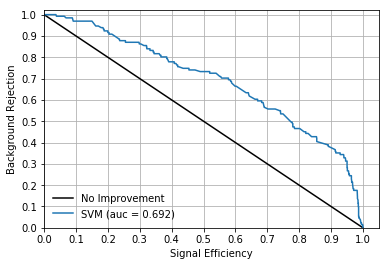

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='SVM (auc = %0.3f)'%auc)
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

## Confusion Matrix

In [71]:
import itertools
from sklearn.metrics import confusion_matrix

start = time.time()

prediction_classes = []
for i in range(len(pred_prob)):
    r = round(pred_prob[i])
    prediction_classes.append(r)
    
end = time.time()  
prediction_classes = np.asarray(prediction_classes)
print("--- %s seconds ---" %(end - start))

print(__doc__)

class_names = ["Sale unsuccessful", "Sale successful"] #Sale unsuccessful Sale successful

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest,prediction_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

TypeError: type numpy.ndarray doesn't define __round__ method